<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [ ]:
import numpy as np

In [ ]:
print(np.float32(12.123452) - np.float32(12.123450))
diff=(np.float32(12.123452) - np.float32(12.123450))
valor_real = 0.000002

error=abs(diff-valor_real)/valor_real*100  #en porcentaje

print(error)
(12.123452/valor_real)*1/(2**31)

1.9073486e-06
4.632568359374996


0.002822711132466793

In [ ]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [ ]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [ ]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [ ]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial


In [ ]:
def exponencial(x,n):
  exp=0
  for i in range(n):
    exp+=(-1)**i * x**i/factorial(i)
  return exp

In [ ]:
x=0.1
n=100
e1=exponencial(x,n)
exp_exacta=np.exp(-x)

In [ ]:
print(f'{e1}')
print(f'{exp_exacta}')

0.9048374180359596
0.9048374180359595


In [ ]:
def exp_truncado(x,n):
  ex=exponencial(x,n)
  tresh=1e-7*ex
  exp_=0
  for i in range(n):
    exp_=abs((-x)**(i+1)/factorial(i+1))
    if exp_<=tresh:
      break
  exp=exponencial(x,i)
  return exp,i


In [ ]:
x1=0.1
n=100
exp_truncado(x1,n)
exacto=np.exp(-x1)
print(f'Valor de la serie: {exponencial(x1,n)}')
print(f'Valor de la serie: {exp_truncado(x1,n)}')
print(f'Valor de la serie: {exacto}')

Valor de la serie: 0.9048374180359596
Valor de la serie: (0.9048333333333334, 4)
Valor de la serie: 0.9048374180359595


In [ ]:
x2=5
n=100
exp_truncado(x2,n)
exacto=np.exp(-x2)
print(f'Valor de la serie: {exponencial(x2,n)}')
print(f'Valor de la serie: {exp_truncado(x2,n)}')
print(f'Valor de la serie: {exacto}')

Valor de la serie: 0.006737946999086907
Valor de la serie: (0.006737947579184599, 27)
Valor de la serie: 0.006737946999085467


In [ ]:
x3=15
n=1000
exp_truncado(x3,n)
exacto=np.exp(-x3)
print(f'Valor de la serie: {exponencial(x3,n)}')
print(f'Valor de la serie: {exp_truncado(x3,n)}')
print(f'Valor de la serie: {exacto}')

Valor de la serie: 3.0593423664124836e-07
Valor de la serie: (3.05934287319534e-07, 63)
Valor de la serie: 3.059023205018258e-07


In [ ]:
def exponencial_inversa(x,n):
  exp=0
  for i in range(n):
    exp+=x**i/factorial(i)
  return 1/exp

In [ ]:
x4=15
n=1000
exp_truncado(x4,n)
exacto=np.exp(-x4)
print(f'Valor de la serie: {exponencial(x4,n)}')
print(f'Valor de la serie invertida: {exponencial_inversa(x4,n)}')
print(f'Valor de la serie exacta: {exacto}')

Valor de la serie: 3.0593423664124836e-07
Valor de la serie invertida: 3.059023205018258e-07
Valor de la serie exacta: 3.059023205018258e-07


In [ ]:
x=10
N=np.arange(1,100,1)
exp1=np.zeros(len(N))
exp2=np.zeros(len(N))
for i,n in enumerate(N):
  exp1[i] =exponencial(x,n)
  exp2[i] =exponencial_inversa(x,n)


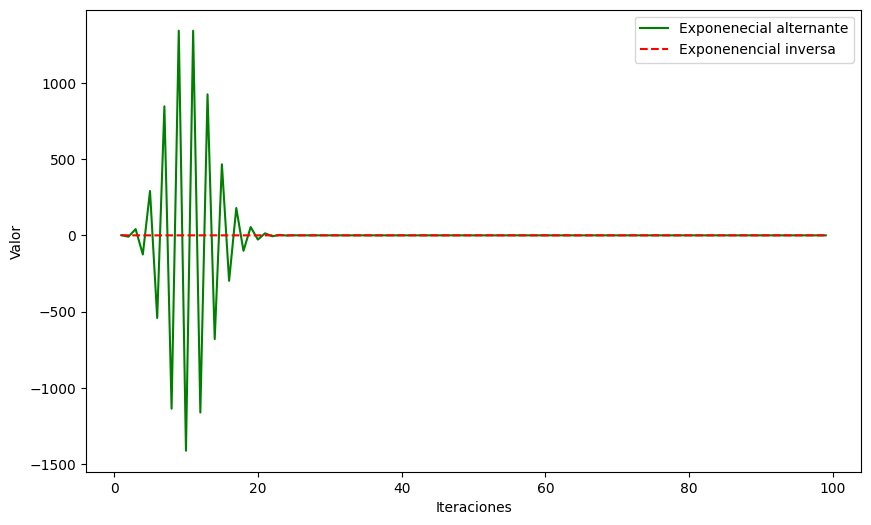

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(N,exp1,'g-',label='Exponenecial alternante')
plt.plot(N,exp2,'r--',label='Exponenencial inversa')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.legend()
plt.show()

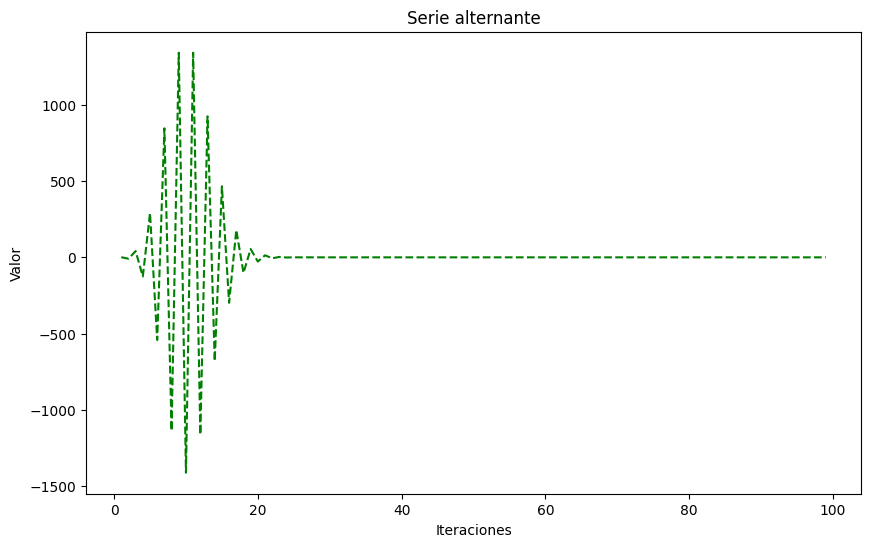

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(N,exp1,'g--',label='Exponenecial alternante')
plt.title('Serie alternante')
#plt.plot(N,exp2,'r--',label='Exponenencial inversa')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.show()

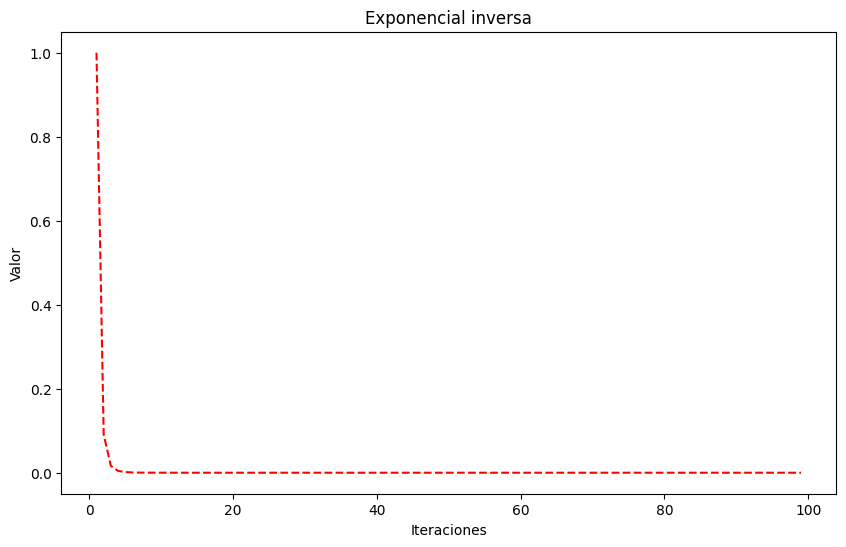

In [ ]:
plt.figure(figsize=(10, 6))
#plt.plot(N,exp1,'g--',label='Exponenecial alternante')
plt.title('Exponencial inversa')
plt.plot(N,exp2,'r--',label='Exponenencial inversa')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.show()

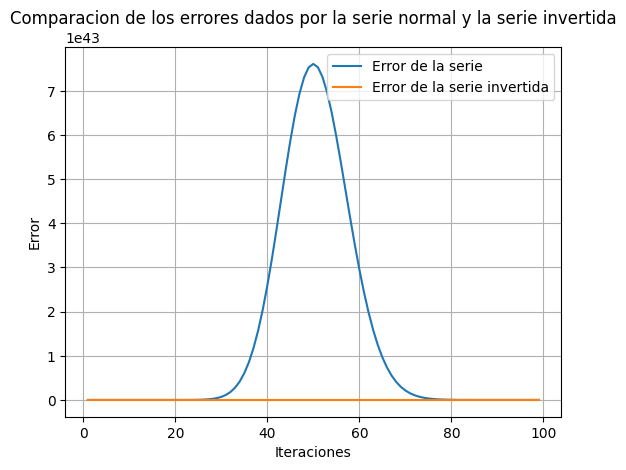

In [ ]:
x = 50
N = np.arange(1,100,1)

for i,n in enumerate(N):
  exp1[i] = exponencial(x,n)
  exp2[i] = exponencial_inversa(x,n)


exacto = np.exp(-x)
error1 = abs(exp1- exacto) / exacto * 100
error2 = abs(exp2 - exacto) /exacto * 100

plt.title('Comparacion de los errores dados por la serie normal y la serie invertida')
plt.plot(N,error1, label = 'Error de la serie')
plt.plot(N,error2, label = 'Error de la serie invertida')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.legend()
plt.grid()

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




*1). Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$*

In [ ]:
def SN1(N):
  s1=0
  for i in range(1,2*N+1):
    s1+=(-1)**i * (i/(i + 1))
  return s1

def SN2(N):
  s2=0
  for i in range(1,N+1):
    s2+=-((2*i-1)/(2*i)) + 2*i/(2*i+1)
  return s2

def SN3(N):
  s3=0
  for i in range(1,N+1):
    s3+=(1/(2*i*(2*i+1)))
  return s3

*2). Estudiar la convergencia de la serie para los tres casos.*

In [ ]:
N=100

sn1=SN1(N)
sn2=SN2(N)
sn3=SN3(N)

print("Serie S_N^(1):", sn1)
print("Serie S_N^(2):", sn2)
print("Serie S_N^(3):", sn3)

Serie S_N^(1): 0.30437144514006564
Serie S_N^(2): 0.30437144514006564
Serie S_N^(3): 0.3043714451400664


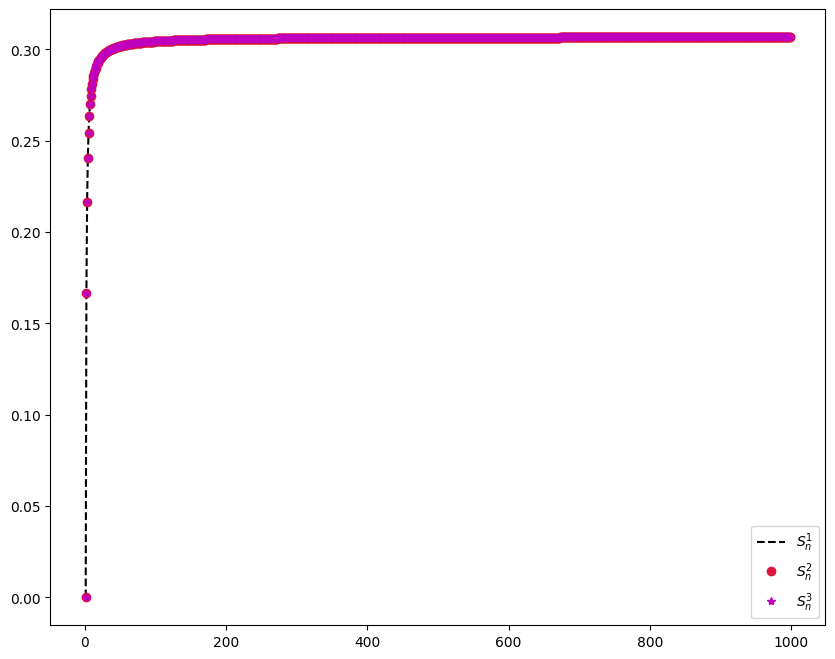

In [ ]:
N=np.arange(1,1000,1)
sn1=np.zeros(len(N))
sn2=np.zeros(len(N))
sn3=np.zeros(len(N))
for i in range(len(N)):
  sn1[i]=SN1(i)
  sn2[i] =SN2(i)
  sn3[i] =SN3(i)

plt.figure(figsize=(10,8))
plt.plot(N,sn1, "k--", label = "$S^1_{n}$")
plt.plot(N,sn2, "o", label = "$S^2_{n}$",color='crimson')
plt.plot(N,sn3,"m*", label = "$S^3_{n}$")
plt.legend()
plt.show()

- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.

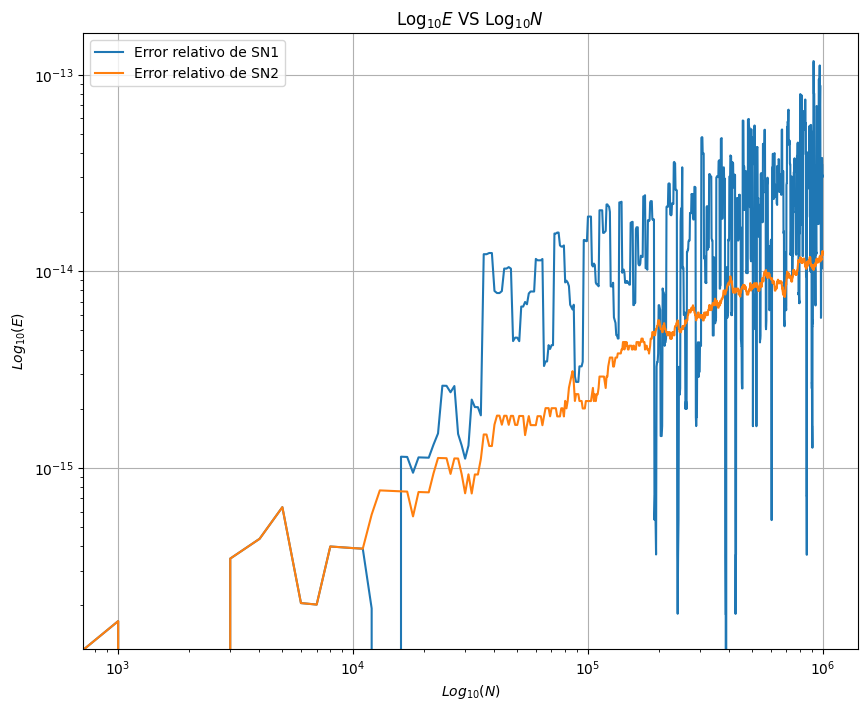

In [ ]:
N = np.linspace(0, 1000001, 1000)
E1 = np.zeros_like(N)
E2 = np.zeros_like(N)

for i in range(1,len(N)):
  E1[i] = abs((SN1(i) - SN3(i)) / SN3(i))
  E2[i] = abs((SN2(i) - SN3(i)) / SN3(i))

plt.figure(figsize=(10,8))
plt.title('$\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$')
plt.loglog(N, E1,  label = 'Error relativo de SN1')
plt.loglog(N, E2,  label = 'Error relativo de SN2')
plt.xlabel('$Log_{10}(N)$')
plt.ylabel('$Log_{10}(E)$')
plt.legend()
plt.grid()